In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

# connect to the csv file and load the data
consumer = pd.read_csv('complaints-2025-09-03_15_50.csv')
consumer.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/23/23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,On XX/XX/XXXX I received notification that the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MD,21209,NaN,Consent provided,Web,10/23/23,Closed with explanation,Yes,NaN,7741393
1,07/07/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,15 U.S. Code $ 1681c-2 a consumer reporting ag...,NaN,JPMORGAN CHASE & CO.,CA,95949,NaN,Consent provided,Web,07/07/23,Closed with explanation,Yes,NaN,7219680
2,11/28/23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,My credit reports are inaccurate. These inaccu...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,XXXXX,NaN,Consent provided,Web,11/28/23,Closed with explanation,Yes,NaN,7907685
3,10/08/23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WI,53089,NaN,Consent not provided,Web,10/08/23,Closed with non-monetary relief,Yes,NaN,7662117
4,02/15/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,ENCORE CAPITAL GROUP INC.,TX,76502,Servicemember,Consent not provided,Web,02/15/23,Closed with non-monetary relief,Yes,NaN,6575908


In [16]:
# showing the count and percent of nulls 
missing_values = pd.DataFrame({
    'Data Type': consumer.dtypes,
    'Null Count': consumer.isnull().sum(),
    'Null %': consumer.isnull().mean() * 100
})
missing_values

,Data Type,Null Count,Null %
Date received,object,0,0.000000
Product,object,0,0.000000
Sub-product,object,0,0.000000
Issue,object,0,0.000000
Sub-issue,object,40784,3.156395
Consumer complaint narrative,object,804662,62.275183
Company public response,object,525878,40.699261
Company,object,0,0.000000
State,object,3605,0.279002
ZIP code,object,110,0.008513


In [17]:
#show rows where Company response to consume is null
consumer[consumer['Company response to consumer'].isnull()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
91519,08/20/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I am writing to request the immediate correcti...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,77449,NaN,Consent provided,Web,08/20/23,NaN,Yes,NaN,7425848
347415,09/25/23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,60478,NaN,Consent not provided,Web,09/25/23,NaN,Yes,NaN,7602539
641446,05/26/23,Mortgage,Conventional home mortgage,Closing on a mortgage,NaN,NaN,Company believes it acted appropriately as aut...,"E Mortgage Capital, Inc.",CA,92860,NaN,Consent not provided,Web,05/26/23,NaN,Yes,NaN,7035005
807700,09/21/23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,JPMORGAN CHASE & CO.,NC,27707,NaN,Other,Web,09/21/23,NaN,Yes,NaN,7577349
898498,11/03/23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32806,NaN,Other,Web,11/03/23,NaN,Yes,NaN,7796225
975705,09/19/23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,75147,NaN,Consent not provided,Web,09/19/23,NaN,Yes,NaN,7565188


In [19]:
# seeing how often data received is different than date sent
consumer['Date_diff'] = consumer['Date received'] != consumer['Date sent to company']
consumer['Date_diff'].value_counts()

Date_diff
False    1246372
True       45735
Name: count, dtype: int64

In [20]:
# creating a column that subtracts date received from date sent to company to see how long companies take to respond
consumer['Response Time'] = pd.to_datetime(consumer['Date sent to company'], format='mixed') - pd.to_datetime(consumer['Date received'], format='mixed')
consumer['Response Time'] = consumer['Response Time'].dt.days
consumer['Response Time'] = pd.to_numeric(consumer['Response Time'], errors='coerce')
consumer['Response Time'].describe()

count    1.292107e+06
mean     5.291241e-01
std      4.326170e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.110000e+02
Name: Response Time, dtype: float64

In [36]:
# filter for columns where the response time is greater than 0 and less than 60
response_time_filtered = consumer[(consumer['Response Time'] > 0) & (consumer['Response Time'] < 60)]
response_time_filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Date_diff,Response Time
89,07/24/23,Mortgage,Other type of mortgage,Struggling to pay mortgage,NaN,Back in XX/XX/2022 I reached out after receivi...,NaN,BID SOLUTIONS LLC,WA,98445,NaN,Consent provided,Web,08/30/23,Closed with monetary relief,No,NaN,7296758,True,37
146,12/21/23,Checking or savings account,Checking account,Opening an account,Unable to open an account,Bank manager at XXXX business manager and bank...,NaN,KEYCORP,GA,316XX,NaN,Consent provided,Web,12/26/23,Closed with explanation,Yes,NaN,8031901,True,5
165,01/02/23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,In XXXX of 2022. I was banking with Hummington...,NaN,"HUNTINGTON NATIONAL BANK, THE",CO,80226,NaN,Consent provided,Web,01/23/23,Closed with monetary relief,Yes,NaN,6385681,True,21
189,08/25/23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,If you feel there is a possibility these items...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,08/28/23,Closed with non-monetary relief,Yes,NaN,7452079,True,3
218,08/08/23,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company has responded to the consumer and the ...,Radius Global Solutions LLC,FL,33179,NaN,Consent not provided,Web,09/06/23,Closed with explanation,Yes,NaN,7370282,True,29


In [39]:
# Response Time Distribution 

response_dist = go.Figure()

# histogram
response_dist.add_trace(go.Histogram(
    x=response_time_filtered['Response Time'],
    nbinsx=50,
    name='Response Time Distribution',
    marker_color='rgba(55, 128, 191, 0.7)',
    marker_line_color='rgba(55, 128, 191, 1.0)',
    marker_line_width=1
))

# Clean layout
response_dist.update_layout(
    title={
        'text': 'Response Time Distribution (Filtered for 1-60 Days)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'family': 'Arial, sans-serif'}
    },
    xaxis_title='Response Time (Days)',
    yaxis_title='Frequency',
    template='plotly_white',
    width=900,
    height=500,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    hovermode='x unified'
)

# Add statistics annotation
mean_response = response_time_filtered['Response Time'].mean()
median_response = response_time_filtered['Response Time'].median()

response_dist.add_annotation(
    x=0.98, y=0.98,
    xref='paper', yref='paper',
    text=f"Mean: {mean_response:.1f} days<br>Median: {median_response:.1f} days<br>Count: {len(response_time_filtered):,}",
    showarrow=False,
    font=dict(size=12),
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="rgba(0,0,0,0.2)",
    borderwidth=1
)

response_dist.show()

In [40]:
# statistics for response time
response_time_filtered['Response Time'].describe()


count    45121.000000
mean        13.922652
std         13.998835
min          1.000000
25%          1.000000
50%          7.000000
75%         26.000000
max         59.000000
Name: Response Time, dtype: float64

In [41]:
# inspecting company complaint counts and response times
company_response = consumer.groupby('Company').agg(
    Response_Time_Mean=('Response Time', 'mean'),
    Complaint_Count=('Complaint ID', 'count')
).reset_index()

# sort by average response time in descending order
company_response = company_response.sort_values(by='Complaint_Count', ascending=False)
company_response.head(15)

,Company,Response_Time_Mean,Complaint_Count
3006,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",0.084969,342703
1130,"EQUIFAX, INC.",0.081001,329181
1195,Experian Information Solutions Inc.,0.092453,306868
3283,WELLS FARGO & COMPANY,0.828540,20722
560,CAPITAL ONE FINANCIAL CORPORATION,1.066984,17019
1682,JPMORGAN CHASE & CO.,0.824207,15615
397,"BANK OF AMERICA, NATIONAL ASSOCIATION",0.958924,14315
606,"CITIBANK, N.A.",1.716313,9796
2781,SYNCHRONY FINANCIAL,2.477942,7095
80,AMERICAN EXPRESS COMPANY,0.800850,6116


In [42]:
#looking to see if each company has multiple zip codes associated with it
company_zip = consumer.groupby('Company').agg(
    Zipcode_Values=('ZIP code', lambda x: x.dropna().unique().tolist())
).reset_index()
company_zip.head(15)

,Company,Zipcode_Values
0,"1 Auto Finance, Inc.",[60123]
1,16 Hands LLC. dba Fiducius,[71201]
2,"1803 Capital, LLC","[70122, 302XX, 30274, 97123, 312XX, 33021, 335..."
3,1ST 2ND MORTGAGE CO. OF NJ INC,[08075]
4,"1ST RESULTS BILLINGS & COLLECTIONS, INC.",[27262]
5,1st Franklin Financial Corporation,"[29073, 30092, 306XX, 296XX, 70461, 35810, 432..."
6,208 Capital Holdings LLC,[83442]
7,21ST MORTGAGE CORP.,"[75050, 474XX, 49548, 49444, 32118, XXXXX, 731..."
8,2233 Paradise Road LLC,"[76513, XXXXX]"
9,2288984 Ontario Inc.,"[323XX, 78728, 33139, 46970, 351XX, 656XX, 542..."


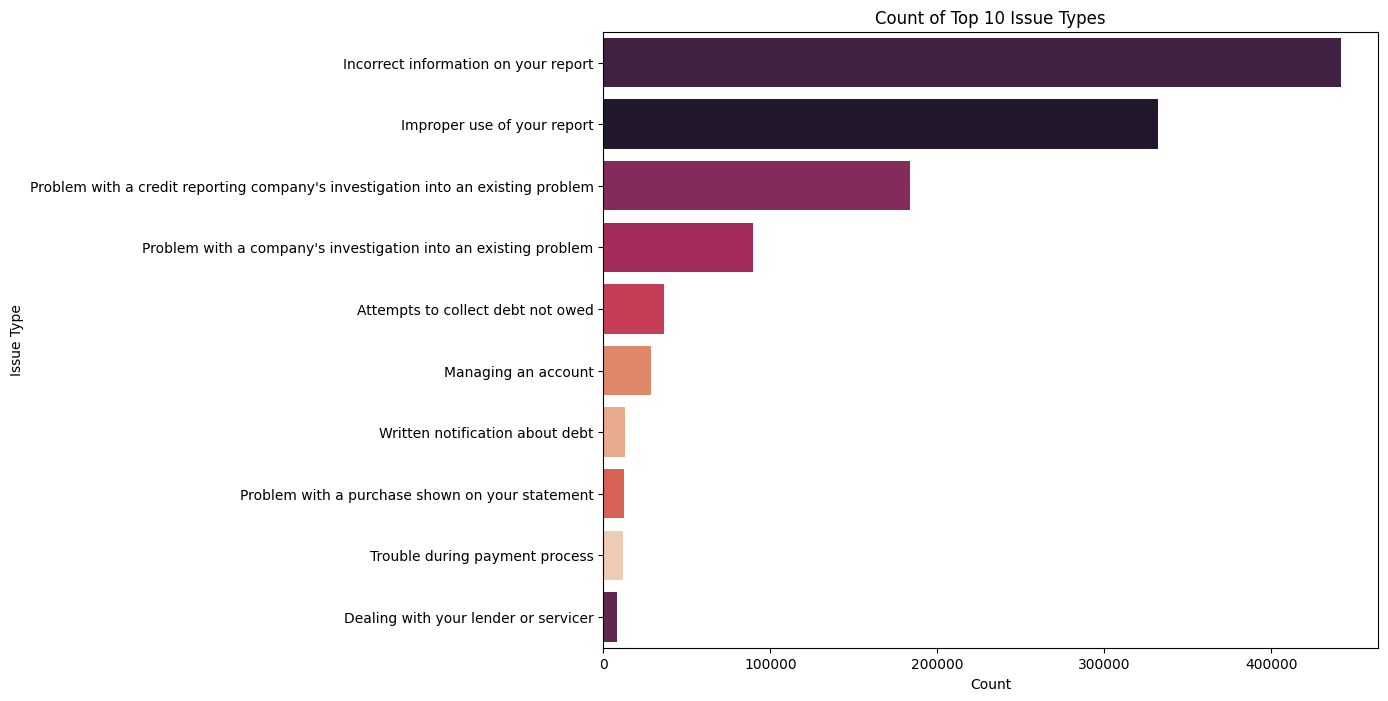

In [25]:
#bar plot of top 10 issue types, made horizontal for better readability
plt.figure(figsize=(10,8))
top_10_issues = consumer['Issue'].value_counts().nlargest(10).index
sns.countplot(y='Issue', data=consumer[consumer['Issue'].isin(top_10_issues)], hue='Issue', palette='rocket', order=top_10_issues, legend=False)
plt.title('Count of Top 10 Issue Types')
plt.xlabel('Count')
plt.ylabel('Issue Type')
plt.show()

In [4]:
# List of banks to filter by
#I asked Claude to identify the banks from the top 50 companies by complaint count to create this list
banks = [
    "WELLS FARGO & COMPANY",
    "JPMORGAN CHASE & CO.",
    "BANK OF AMERICA, NATIONAL ASSOCIATION",
    "CITIBANK, N.A.",
    "U.S. BANCORP",
    "TRUIST FINANCIAL CORPORATION",
    "TD BANK US HOLDING COMPANY",
    "GOLDMAN SACHS BANK USA",
    "BARCLAYS BANK DELAWARE",
    "SANTANDER HOLDINGS USA, INC.",
    "PNC Bank N.A.",
    "CITIZENS FINANCIAL GROUP, INC.",
    "DISCOVER BANK",
    "CAPITAL ONE FINANCIAL CORPORATION",
    "SYNCHRONY FINANCIAL",
    "AMERICAN EXPRESS COMPANY",
    "ALLY FINANCIAL INC.",
    "NAVY FEDERAL CREDIT UNION"
]

#filtering the consumer dataframe to include only the specified banks
bank_complaints = consumer[consumer['Company'].isin(banks)]
bank_complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Response Time
1,07/07/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,15 U.S. Code $ 1681c-2 a consumer reporting ag...,NaN,JPMORGAN CHASE & CO.,CA,95949,NaN,Consent provided,Web,07/07/23,Closed with explanation,Yes,NaN,7219680,0
25,01/06/23,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,NaN,NaN,GOLDMAN SACHS BANK USA,FL,32003,NaN,NaN,Phone,01/06/23,Closed with explanation,Yes,NaN,6407464,0
32,04/25/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Credit bureaus reporting as delinquent. My acc...,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,337XX,NaN,Consent provided,Web,04/25/23,Closed with explanation,Yes,NaN,6880689,0
34,03/23/23,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,NaN,JPMORGAN CHASE & CO.,NY,10705,NaN,Consent not provided,Web,03/23/23,Closed with explanation,Yes,NaN,6736180,0
42,01/02/23,Checking or savings account,Savings account,Opening an account,Account opened as a result of fraud,A Bank of America XXXX XXXX account was opened...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MI,48185,NaN,Consent provided,Web,01/02/23,Closed with non-monetary relief,Yes,NaN,6389050,0


In [5]:
#create a count of unique Issue types per bank
bank_issue_counts = bank_complaints.groupby('Company')['Issue'].nunique().reset_index()
bank_issue_counts.columns = ['Company', 'Unique Issue Count']
bank_issue_counts = bank_issue_counts.sort_values(by='Unique Issue Count', ascending=False)
bank_issue_counts

,Company,Unique Issue Count
17,WELLS FARGO & COMPANY,75
9,JPMORGAN CHASE & CO.,72
2,"BANK OF AMERICA, NATIONAL ASSOCIATION",70
16,U.S. BANCORP,65
13,SYNCHRONY FINANCIAL,65
6,"CITIZENS FINANCIAL GROUP, INC.",65
4,CAPITAL ONE FINANCIAL CORPORATION,65
10,NAVY FEDERAL CREDIT UNION,64
5,"CITIBANK, N.A.",63
14,TD BANK US HOLDING COMPANY,60


In [6]:
# looking at complaint counts by Issues - limited to the bank data frame (wanting to focus on similar companies)
issue_counts = bank_complaints['Issue'].value_counts().reset_index()
issue_counts.columns = ['Issue', 'Complaint Count']
issue_counts['Issue Percent'] = (issue_counts['Complaint Count'] / issue_counts['Complaint Count'].sum()) * 100
issue_counts.head(25)

,Issue,Complaint Count,Issue Percent
0,Managing an account,20776,16.288770
1,Improper use of your report,14202,11.134632
2,Incorrect information on your report,12421,9.738295
3,Problem with a purchase shown on your statement,10609,8.317653
4,Getting a credit card,5760,4.515947
5,Closing an account,4935,3.869132
6,"Other features, terms, or problems",4864,3.813466
7,Problem with a lender or other company chargin...,4114,3.225452
8,Fees or interest,3525,2.763665
9,Opening an account,3486,2.733089


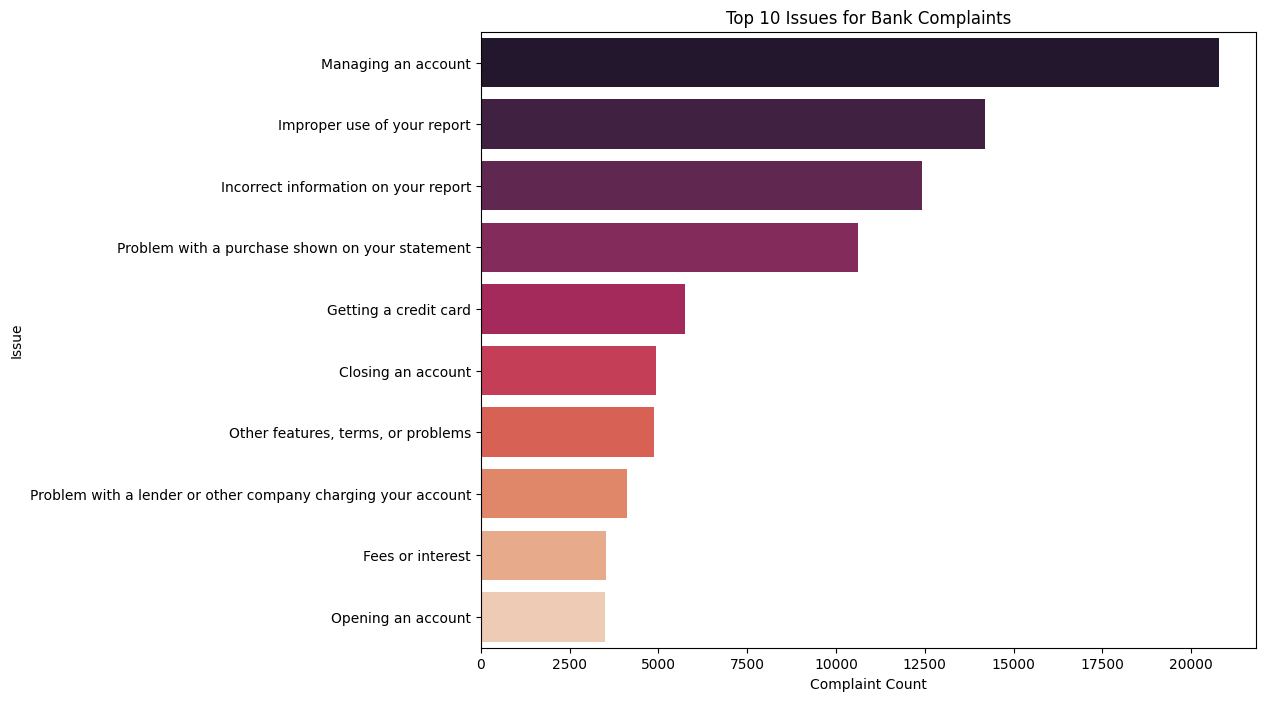

In [7]:
# bar chart of the top 10 issues for banks
plt.figure(figsize=(10,8))
top_10_bank_issues = issue_counts.nlargest(10, 'Complaint Count')
sns.barplot(y='Issue', x='Complaint Count', data=top_10_bank_issues, hue='Issue', palette='rocket')
plt.title('Top 10 Issues for Bank Complaints')
plt.xlabel('Complaint Count')
plt.ylabel('Issue')
plt.show()

In [17]:
# looking at complaint counts by Product - limited to the bank data frame (wanting to focus on similar companies)
product_counts = bank_complaints['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Product Count']
product_counts['Product Percent'] = (product_counts['Product Count'] / product_counts['Product Count'].sum()) * 100
product_counts.head(25)

,Product,Product Count,Product Percent
0,Checking or savings account,36242,28.414401
1,Credit card or prepaid card,23168,18.164142
2,"Credit reporting, credit repair services, or o...",18368,14.400853
3,Credit card,13927,10.919027
4,Credit reporting or other personal consumer re...,11583,9.081287
5,Mortgage,6300,4.939317
6,Debt collection,5636,4.418729
7,Vehicle loan or lease,4990,3.912253
8,"Money transfer, virtual currency, or money ser...",4770,3.739769
9,Prepaid card,1246,0.976887


In [18]:
#create statistics for the products
product_counts.describe()

,Product Count,Product Percent
count,14.000000,14.000000
mean,9110.571429,7.142857
std,10651.996741,8.351363
min,63.000000,0.049393
25%,832.750000,0.652891
50%,5313.000000,4.165491
75%,13341.000000,10.459592
max,36242.000000,28.414401


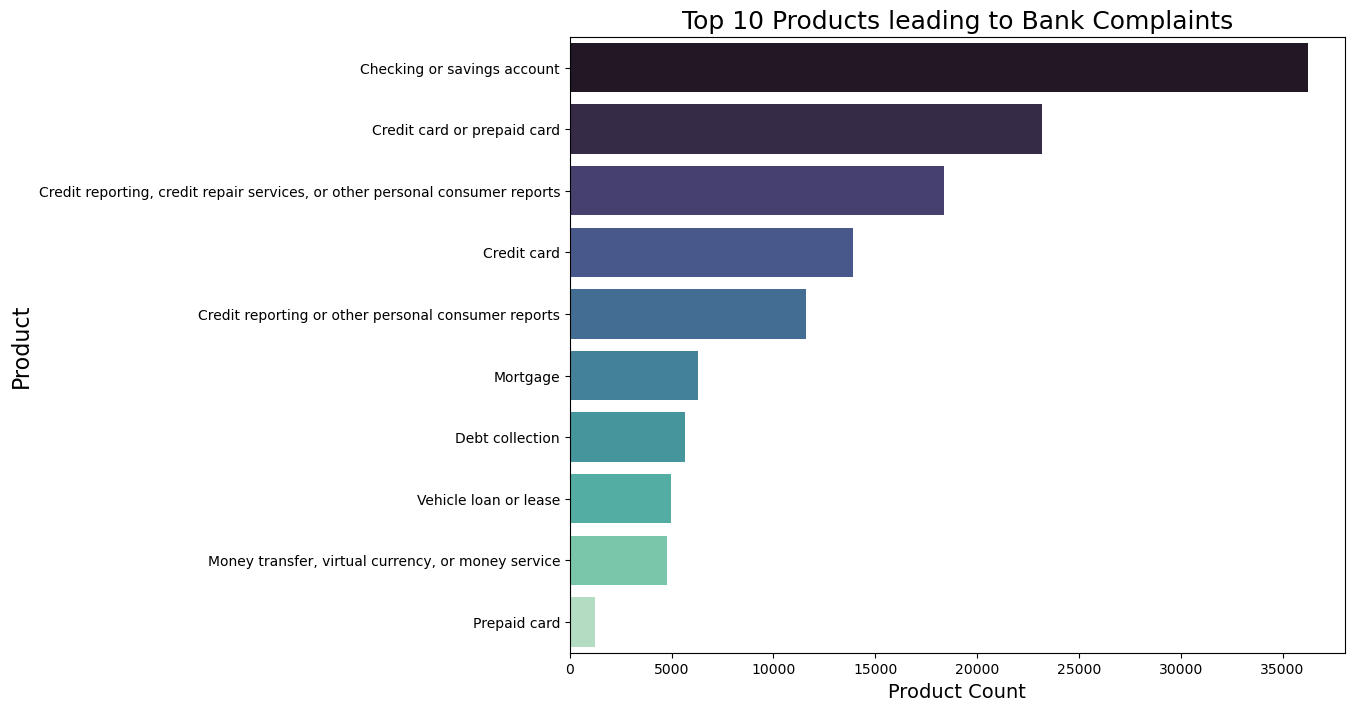

In [19]:
# bar chart of the top 10 products with issues/complaints for banks
plt.figure(figsize=(10,8))
top_10_bank_products = product_counts.nlargest(10, 'Product Count')
sns.barplot(y='Product', x='Product Count', data=top_10_bank_products, hue='Product', palette='mako')
plt.title('Top 10 Products leading to Bank Complaints', fontsize=18)
plt.xlabel('Product Count', fontsize=14)
plt.ylabel('Product', fontsize=16)
plt.show()

## Definitions of Common Issues
**Managing an account**<br>
This covers problems consumers have with day-to-day account management, such as:

* Difficulty accessing online banking or mobile apps 
* Problems opening, closing, or changing account features
* Issues with account statements or notifications
* Customer service problems when trying to manage the account
* Restrictions placed on accounts without clear explanation

**Improper use of your report**<br>
This refers to misuse of consumer credit reports, including:

* Companies pulling your credit report without permission (unauthorized hard inquiries)
* Employers or landlords accessing reports inappropriately
* Identity thieves using your information to access credit reports
* Credit reports being used for purposes not allowed by law
* Reports being shared with unauthorized third parties

**Incorrect information on your report**<br>
These are disputes about inaccurate data on credit reports:

* Wrong personal information (names, addresses, Social Security numbers)
* Accounts that don't belong to you appearing on your report
* Incorrect payment history or account status
* Accounts showing as open when they're closed (or vice versa)
* Wrong balances, credit limits, or dates
* Information that should have been removed but wasn't

**Problem with a purchase shown on your statement**<br>
This involves billing disputes and transaction issues:

* Charges for items you didn't purchase or authorize
* Incorrect amounts charged for purchases you did make
* Duplicate charges appearing on statements
* Charges that weren't properly credited or refunded
* Subscriptions or recurring charges you tried to cancel
* Merchant billing errors or fraudulent transactions

*List created by Claude from this prompt:*
> I am looking at data from the CFPB, explain what these issues mean:<br>
Managing an account<br>
Improper use of your report<br>
Incorrect information on your report<br>
Problem with a purchase shown on your statement<br>


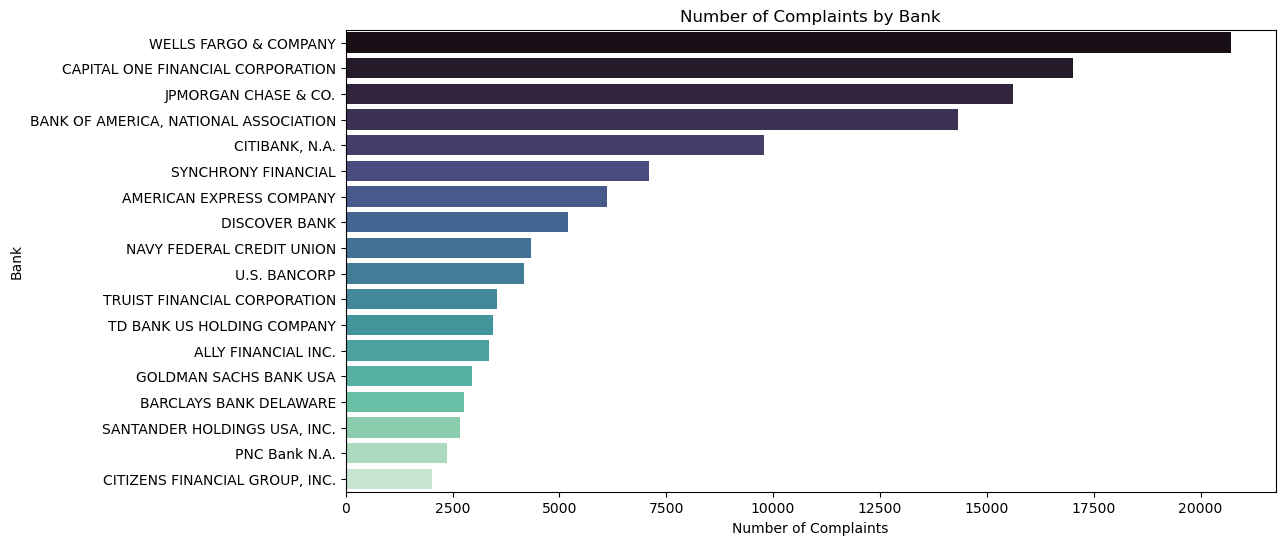

In [20]:
#building a dataframe to see the number of complaints per bank, used reset_index to maintain the descending value order of the complaint counts
bank_complaint_counts = bank_complaints['Company'].value_counts().reset_index()
bank_complaint_counts.columns = ['Company', 'Complaint Count']

#bar plot to visualize the number of complaints for each bank
plt.figure(figsize=(12,6))
sns.barplot(y='Company', x='Complaint Count', data=bank_complaint_counts, hue='Company',palette='mako')
plt.title('Number of Complaints by Bank')
plt.xlabel('Number of Complaints')
plt.ylabel('Bank')
plt.show()

In [21]:
#adding a column to bank_complaint_counts that counts the aggregate of 'Timely response?' == 'Yes' for each bank
timely_responses = bank_complaints[bank_complaints['Timely response?'] == 'Yes']['Company'].value_counts().reset_index()
timely_responses.columns = ['Company', 'Timely Response Count'] 

# merging complaint counts and timely responses 
merged_bank_data = pd.merge(bank_complaint_counts, timely_responses, on='Company', how='left')
merged_bank_data['% Timely Response'] = (merged_bank_data['Timely Response Count'] / merged_bank_data['Complaint Count']) * 100
merged_bank_data

,Company,Complaint Count,Timely Response Count,% Timely Response
0,WELLS FARGO & COMPANY,20722,20722,100.000000
1,CAPITAL ONE FINANCIAL CORPORATION,17019,17018,99.994124
2,JPMORGAN CHASE & CO.,15615,15615,100.000000
3,"BANK OF AMERICA, NATIONAL ASSOCIATION",14315,13718,95.829549
4,"CITIBANK, N.A.",9796,9796,100.000000
5,SYNCHRONY FINANCIAL,7095,7095,100.000000
6,AMERICAN EXPRESS COMPANY,6116,6114,99.967299
7,DISCOVER BANK,5211,5211,100.000000
8,NAVY FEDERAL CREDIT UNION,4335,4335,100.000000
9,U.S. BANCORP,4183,4183,100.000000


In [22]:
merged_bank_data.describe()

,Complaint Count,Timely Response Count,% Timely Response
count,18.000000,18.000000,18.000000
mean,7086.000000,7051.555556,99.730337
std,5841.537318,5800.336301,0.976807
min,2031.000000,2031.000000,95.829549
25%,3053.250000,3046.250000,99.968014
50%,4259.000000,4259.000000,100.000000
75%,9120.750000,9120.750000,100.000000
max,20722.000000,20722.000000,100.000000


In [23]:
#aggregating the number of complaints by the month (pull month from date received column)
#ended up being useless... but kept this for reference

consumer['Month'] = pd.to_datetime(consumer['Date received'], format='mixed').dt.to_period('M')
monthly_complaints = consumer['Month'].value_counts().sort_index().reset_index()
monthly_complaints.columns = ['Month', 'Complaint Count']
monthly_complaints

,Month,Complaint Count
0,2023-01,93936
1,2023-02,86541
2,2023-03,110643
3,2023-04,97087
4,2023-05,106216
5,2023-06,104429
6,2023-07,106776
7,2023-08,119715
8,2023-09,112887
9,2023-10,117433


In [24]:
# trying to understand count of complaints by state from the bank_complaints dataframe
#noticed that the 'State' symbol DC is for district of columbia, updated the Excel file population data from Census to match that
state_complaints = bank_complaints['State'].value_counts().reset_index()
state_complaints.columns = ['State', 'Complaint Count']
state_complaints.head()

,State,Complaint Count
0,CA,18074
1,FL,14077
2,TX,11050
3,NY,10402
4,GA,7155


In [25]:
# population by state data from Census data (ACS estimates)
population_data = pd.read_excel('PopulationbyState.xlsx')
population_data.head()

,State Name,State Symbol,Total Population,Over 18 Population
0,Alabama,AL,5157699,4022842
1,Alaska,AK,740133,565186
2,Arizona,AZ,7582384,5994209
3,Arkansas,AR,3088354,2386510
4,California,CA,39431263,31012711


In [27]:
# merging state complaint counts with population data to get complaints as a ratio of population (CFPB noted that complaints are higher in states with larger populations)
state_population_complaints = pd.merge(state_complaints, population_data, left_on='State', right_on='State Symbol', how='left')
state_population_complaints['Complaints per 100k'] = (state_population_complaints['Complaint Count'] / state_population_complaints['Total Population']) * 100000

#noticed null values in states, since some were places like Puerto Rico and Virgin Islands (territories)
state_population_complaints = state_population_complaints.dropna(subset=['State Symbol'])

# ordering by complaint ratio
state_population_complaints = state_population_complaints.sort_values(by='Complaints per 100k', ascending=False)
state_population_complaints.head()

,State,Complaint Count,State Name,State Symbol,Total Population,Over 18 Population,Complaints per 100k
28,DC,790,District of Columbia,DC,702250.0,572419.0,112.495550
4,GA,7155,Georgia,GA,11180878.0,8640127.0,63.993186
30,DE,635,Delaware,DE,1051917.0,838204.0,60.365979
17,NV,1972,Nevada,NV,3267467.0,2579031.0,60.352561
1,FL,14077,Florida,FL,23372215.0,18872523.0,60.229636


In [28]:
state_population_complaints.tail()

,State,Complaint Count,State Name,State Symbol,Total Population,Over 18 Population,Complaints per 100k
31,OK,625,Oklahoma,OK,4095393.0,3129179.0,15.261051
36,IA,476,Iowa,IA,3241488.0,2510913.0,14.684614
45,MT,160,Montana,MT,1137233.0,904578.0,14.069236
32,KY,613,Kentucky,KY,4588372.0,3562700.0,13.359858
51,ND,78,North Dakota,ND,796568.0,611305.0,9.792008


In [29]:
state_population_complaints.describe()

,Complaint Count,Total Population,Over 18 Population,Complaints per 100k
count,51.000000,5.100000e+01,5.100000e+01,51.000000
mean,2482.372549,6.668843e+06,5.234868e+06,30.918132
std,3677.341920,7.602106e+06,5.951704e+06,18.453125
min,78.000000,5.876180e+05,4.596260e+05,9.792008
25%,409.000000,1.885799e+06,1.471384e+06,18.154788
50%,1215.000000,4.588372e+06,3.531346e+06,25.470648
75%,2715.500000,7.770282e+06,6.148676e+06,37.743474
max,18074.000000,3.943126e+07,3.101271e+07,112.495550
